In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from urllib.parse import urlparse
from tld import get_tld, is_tld
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
#df1 = pd.read_csv('urldata.csv')
#df2 = pd.read_csv('data.csv')
#combined_df = pd.concat([df1, df2], ignore_index=True)
#combined_df.to_csv('final_dataset.csv', index=False)

In [3]:
#load dataset
urlDataset = pd.read_csv('final_dataset.csv')
#print dataset
urlDataset.head()

,url,type
0,https://www.google.com,benign
1,https://www.youtube.com,benign
2,https://www.facebook.com,benign
3,https://www.baidu.com,benign
4,https://www.wikipedia.org,benign


In [4]:
urlDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870640 entries, 0 to 870639
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     870640 non-null  object
 1   type    870640 non-null  object
dtypes: object(2)
memory usage: 13.3+ MB


In [5]:
#Add labels to the url type to catagorize the url type numerically
urlDataset["urlType_numeric"] = urlDataset["type"].replace({
    'benign':0,
    'good':0,
    'malicious':1,
    'bad':1
});
urlDataset.head()

,url,type,urlType_numeric
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [39]:
import seaborn as sns
count = urlDataset.urlType_numeric.value_counts()
count

urlType_numeric
0    690559
1    180081
Name: count, dtype: int64

C:\Users\Chathushi Ranasinghe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Chathushi Ranasinghe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Chathushi Ranasinghe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


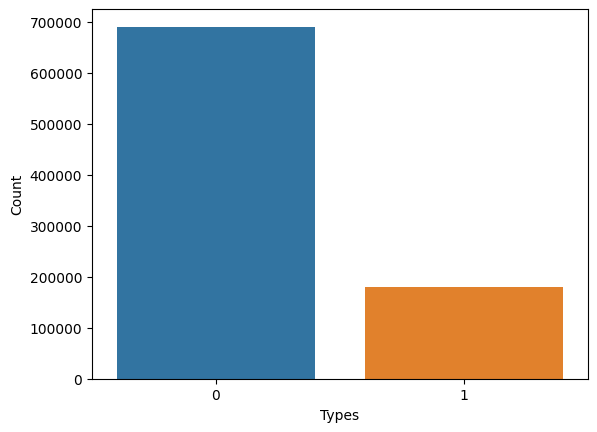

In [41]:
sns.barplot(x=count.index, y=count)
plot.xlabel('Types')
plot.ylabel('Count');

In [6]:
#Lexical feature extraction

#length of URL
def getUrlLength(url):
    return len(str(url))
    
#apply the function to all the urls in dataset
urlDataset['urlLength'] = urlDataset['url'].apply(lambda x: getUrlLength(x)) 

urlDataset.head()

,url,type,urlType_numeric,urlLength
0,https://www.google.com,benign,0,22
1,https://www.youtube.com,benign,0,23
2,https://www.facebook.com,benign,0,24
3,https://www.baidu.com,benign,0,21
4,https://www.wikipedia.org,benign,0,25


In [7]:
#length of hostname
def getHostnameLength(url):
    try:
        parsedURL = urlparse(url)
        return len(parsedURL.netloc)
    except:
        return 0

#apply the function to all the urls in dataset
urlDataset['hostnameLength'] = urlDataset['url'].apply(lambda x: getHostnameLength(x)) 

urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength
0,https://www.google.com,benign,0,22,14
1,https://www.youtube.com,benign,0,23,15
2,https://www.facebook.com,benign,0,24,16
3,https://www.baidu.com,benign,0,21,13
4,https://www.wikipedia.org,benign,0,25,17


In [8]:
#length of path
def getPathLength(url):
    try:
        return len(urlparse(url).path)
    except:
        return 0

#apply the function to all the urls in dataset
urlDataset['pathLength'] = urlDataset['url'].apply(lambda x: getPathLength(x)) 

urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength
0,https://www.google.com,benign,0,22,14,0
1,https://www.youtube.com,benign,0,23,15,0
2,https://www.facebook.com,benign,0,24,16,0
3,https://www.baidu.com,benign,0,21,13,0
4,https://www.wikipedia.org,benign,0,25,17,0


In [9]:
#length of Top level domain
def getTldLength(url):
    try:
        tld = get_tld(url, fail_silently=True,fix_protocol=True)
        return len(tld)
    except:
        return 0

#apply the function to all the urls in dataset
urlDataset['tldLength'] = urlDataset['url'].apply(lambda x: getTldLength(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength
0,https://www.google.com,benign,0,22,14,0,3
1,https://www.youtube.com,benign,0,23,15,0,3
2,https://www.facebook.com,benign,0,24,16,0,3
3,https://www.baidu.com,benign,0,21,13,0,3
4,https://www.wikipedia.org,benign,0,25,17,0,3


In [10]:
#Number of character '-'
def getNumOfHyphen(url):
    return url.count('-')

#apply the function to all the urls in dataset
urlDataset['"-"'] = urlDataset['url'].apply(lambda x: getNumOfHyphen(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-"""
0,https://www.google.com,benign,0,22,14,0,3,0
1,https://www.youtube.com,benign,0,23,15,0,3,0
2,https://www.facebook.com,benign,0,24,16,0,3,0
3,https://www.baidu.com,benign,0,21,13,0,3,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0


In [11]:
#Number of character '@'
def getNumOfAt(url):
    return url.count('@')

#apply the function to all the urls in dataset
urlDataset['"@"'] = urlDataset['url'].apply(lambda x: getNumOfAt(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@"""
0,https://www.google.com,benign,0,22,14,0,3,0,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0


In [12]:
#Number of character '?'
def getNumOfQueMark(url):
    return url.count('?')

#apply the function to all the urls in dataset
urlDataset['"?"'] = urlDataset['url'].apply(lambda x: getNumOfQueMark(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?"""
0,https://www.google.com,benign,0,22,14,0,3,0,0,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0


In [13]:
#Number of character '%'
def getNumOfPercMark(url):
    return url.count('%')

#apply the function to all the urls in dataset
urlDataset['"%"'] = urlDataset['url'].apply(lambda x: getNumOfPercMark(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""","""%"""
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,0


In [14]:
#Number of character '/'
def getNumOfSlash(url):
    return url.count('/')

#apply the function to all the urls in dataset
urlDataset['"/"'] = urlDataset['url'].apply(lambda x: getNumOfSlash(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""","""%""","""/"""
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,0,2
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,0,2
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,0,2
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,0,2
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,0,2


In [15]:
#Number of character '.'
def getNumOfFullstop(url):
    return url.count('.')

#apply the function to all the urls in dataset
urlDataset['"."'] = urlDataset['url'].apply(lambda x: getNumOfFullstop(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""","""%""","""/""","""."""
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,0,2,2
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,0,2,2
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,0,2,2
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,0,2,2
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,0,2,2


In [16]:
#Number of character '&'
def getNumOfAmpersand(url):
    return url.count('&')

#apply the function to all the urls in dataset
urlDataset['"&"'] = urlDataset['url'].apply(lambda x: getNumOfAmpersand(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""","""%""","""/""",""".""","""&"""
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,0,2,2,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,0,2,2,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,0,2,2,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,0,2,2,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,0,2,2,0


In [17]:
#Number of character '_'
def getNumOfUnderscore(url):
    return url.count('_')

#apply the function to all the urls in dataset
urlDataset['"_"'] = urlDataset['url'].apply(lambda x: getNumOfUnderscore(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""","""%""","""/""",""".""","""&""","""_"""
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,0,2,2,0,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,0,2,2,0,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,0,2,2,0,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,0,2,2,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,0,2,2,0,0


In [18]:
#Number of character '='
def getNumOfEqual(url):
    return url.count('=')

#apply the function to all the urls in dataset
urlDataset['"="'] = urlDataset['url'].apply(lambda x: getNumOfEqual(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""","""%""","""/""",""".""","""&""","""_""","""="""
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,0,2,2,0,0,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,0,2,2,0,0,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,0,2,2,0,0,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,0,2,2,0,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,0,2,2,0,0,0


In [19]:
#Number of character '!'
def getNumOfExclamationMark(url):
    return url.count('!')

#apply the function to all the urls in dataset
urlDataset['"!"'] = urlDataset['url'].apply(lambda x: getNumOfExclamationMark(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""","""%""","""/""",""".""","""&""","""_""","""=""","""!"""
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,0,2,2,0,0,0,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,0,2,2,0,0,0,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,0,2,2,0,0,0,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,0,2,2,0,0,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,0,2,2,0,0,0,0


In [20]:
#Number of digits
def getNumOfDigits(url):
    noOfDigits = 0
    noOfDigits = sum(c.isdigit() for c in url)
    return noOfDigits

#apply the function to all the urls in dataset
urlDataset['noOfDigits'] = urlDataset['url'].apply(lambda x: getNumOfDigits(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""","""%""","""/""",""".""","""&""","""_""","""=""","""!""",noOfDigits
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,0,2,2,0,0,0,0,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,0,2,2,0,0,0,0,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,0,2,2,0,0,0,0,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,0,2,2,0,0,0,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,0,2,2,0,0,0,0,0


In [21]:
#Number of letters
def getNumOfLetters(url):
    noOfLetters = 0
    noOfLetters = sum(c.isalpha() for c in url)
    return noOfLetters

#apply the function to all the urls in dataset
urlDataset['noOfLetters'] = urlDataset['url'].apply(lambda x: getNumOfLetters(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""","""%""","""/""",""".""","""&""","""_""","""=""","""!""",noOfDigits,noOfLetters
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,0,2,2,0,0,0,0,0,17
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,0,2,2,0,0,0,0,0,18
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,0,2,2,0,0,0,0,0,19
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,0,2,2,0,0,0,0,0,16
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,0,2,2,0,0,0,0,0,20


In [22]:
#Number of directories
def getNumOfDirectories(url):
    try:
        path = urlparse(url).path
        noOfDirectories = 0
        noOfDirectories = path.count('/')
        return noOfDirectories
    except:
        return 0

#apply the function to all the urls in dataset
urlDataset['noOfDir'] = urlDataset['url'].apply(lambda x: getNumOfDirectories(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""","""%""","""/""",""".""","""&""","""_""","""=""","""!""",noOfDigits,noOfLetters,noOfDir
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,0,2,2,0,0,0,0,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,0,2,2,0,0,0,0,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,0,2,2,0,0,0,0,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,0,2,2,0,0,0,0,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,0,2,2,0,0,0,0,0,20,0


In [24]:
#Use of IP (1-yes, 0-no)
import re
def hasIP(url):
    checkIP = re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' 
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)
    if checkIP:
        return 1
    else:
        return 0
        
#apply the function to all the urls in dataset
urlDataset['hasIP'] = urlDataset['url'].apply(lambda x: hasIP(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""",...,""".""","""&""","""_""","""=""","""!""",noOfDigits,noOfLetters,noOfDir,hasPort,hasIP
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,...,2,0,0,0,0,0,17,0,0,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,...,2,0,0,0,0,0,18,0,0,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,...,2,0,0,0,0,0,19,0,0,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,...,2,0,0,0,0,0,16,0,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,...,2,0,0,0,0,0,20,0,0,0


In [25]:
#URL entropy - 
from scipy.stats import entropy
import math
def getEntropy(url):
    url = url.lower()
    uniqueCharacters = set(url) #extracts the unique characters of the url
    probs = (url.count(c) / len(url) for c in uniqueCharacters) #probabilities of each unique character are calculated by counting their occurrences and dividing by the total URL length.
    e = -sum([p * math.log(p) / math.log(2.0) for p in probs]) # Calculate entropy using the Shannon entropy formula
    return e

#apply the function to all the urls in dataset
urlDataset['entropy'] = urlDataset['url'].apply(lambda x: getEntropy(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""",...,"""&""","""_""","""=""","""!""",noOfDigits,noOfLetters,noOfDir,hasPort,hasIP,entropy
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,...,0,0,0,0,0,17,0,0,0,3.663533
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,...,0,0,0,0,0,18,0,0,0,3.762267
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,...,0,0,0,0,0,19,0,0,0,3.855389
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,...,0,0,0,0,0,16,0,0,0,3.880180
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,...,0,0,0,0,0,20,0,0,0,3.813661


In [26]:
#has HTTP
def hashttp(url):
   if url.startswith('http://'):
       return 1
   else:
       return 0


#apply the function to all the urls in dataset
urlDataset['hasHttp'] = urlDataset['url'].apply(lambda x: hashttp(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""",...,"""_""","""=""","""!""",noOfDigits,noOfLetters,noOfDir,hasPort,hasIP,entropy,hasHttp
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,...,0,0,0,0,17,0,0,0,3.663533,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,...,0,0,0,0,18,0,0,0,3.762267,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,...,0,0,0,0,19,0,0,0,3.855389,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,...,0,0,0,0,16,0,0,0,3.880180,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,...,0,0,0,0,20,0,0,0,3.813661,0


In [27]:
#has HTTPS
def hashttps(url):
   if url.startswith('https://'):
       return 1
   else:
       return 0

#apply the function to all the urls in dataset
urlDataset['hasHttps'] = urlDataset['url'].apply(lambda x: hashttps(x))  
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""",...,"""=""","""!""",noOfDigits,noOfLetters,noOfDir,hasPort,hasIP,entropy,hasHttp,hasHttps
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,...,0,0,0,17,0,0,0,3.663533,0,1
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,...,0,0,0,18,0,0,0,3.762267,0,1
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,...,0,0,0,19,0,0,0,3.855389,0,1
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,...,0,0,0,16,0,0,0,3.880180,0,1
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,...,0,0,0,20,0,0,0,3.813661,0,1


In [28]:
def fdLength(url):
    try:
        urlpath= urlparse(url).path
        return len(urlpath.split('/')[1])
    except:
        return 0
urlDataset['fdLength'] = urlDataset['url'].apply(lambda x: fdLength(x))
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""",...,"""!""",noOfDigits,noOfLetters,noOfDir,hasPort,hasIP,entropy,hasHttp,hasHttps,fdLength
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,...,0,0,17,0,0,0,3.663533,0,1,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,...,0,0,18,0,0,0,3.762267,0,1,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,...,0,0,19,0,0,0,3.855389,0,1,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,...,0,0,16,0,0,0,3.880180,0,1,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,...,0,0,20,0,0,0,3.813661,0,1,0


In [29]:
def numParameters(url):
        params = url.split('&')
        return len(params) - 1
urlDataset['numParameters'] = urlDataset['url'].apply(lambda x: numParameters(x))

In [30]:
def numSubDomains(url):
        subdomains = url.split('//')[-1].split('/')
        return len(subdomains)-1

urlDataset['numSubDomains'] = urlDataset['url'].apply(lambda x: numSubDomains(x))
urlDataset.head()

,url,type,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""@""","""?""",...,noOfLetters,noOfDir,hasPort,hasIP,entropy,hasHttp,hasHttps,fdLength,numParameters,numSubDomains
0,https://www.google.com,benign,0,22,14,0,3,0,0,0,...,17,0,0,0,3.663533,0,1,0,0,0
1,https://www.youtube.com,benign,0,23,15,0,3,0,0,0,...,18,0,0,0,3.762267,0,1,0,0,0
2,https://www.facebook.com,benign,0,24,16,0,3,0,0,0,...,19,0,0,0,3.855389,0,1,0,0,0
3,https://www.baidu.com,benign,0,21,13,0,3,0,0,0,...,16,0,0,0,3.880180,0,1,0,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,0,...,20,0,0,0,3.813661,0,1,0,0,0


In [33]:
#features
x = urlDataset[['urlType_numeric','urlLength',
       'hostnameLength', 'pathLength', 'tldLength', '"-"', '"?"', '"@"',
       '"%"','"/"', '"."','"&"','"_"', '"="', '"!"','noOfDigits','noOfLetters', 'noOfDir', 'hasIP', 'entropy', 'hasHttp', 'hasHttps',
       'fdLength','numParameters','numSubDomains']]
x.head()

,urlType_numeric,urlLength,hostnameLength,pathLength,tldLength,"""-""","""?""","""@""","""%""","""/""",...,noOfDigits,noOfLetters,noOfDir,hasIP,entropy,hasHttp,hasHttps,fdLength,numParameters,numSubDomains
0,0,22,14,0,3,0,0,0,0,2,...,0,17,0,0,3.663533,0,1,0,0,0
1,0,23,15,0,3,0,0,0,0,2,...,0,18,0,0,3.762267,0,1,0,0,0
2,0,24,16,0,3,0,0,0,0,2,...,0,19,0,0,3.855389,0,1,0,0,0
3,0,21,13,0,3,0,0,0,0,2,...,0,16,0,0,3.880180,0,1,0,0,0
4,0,25,17,0,3,0,0,0,0,2,...,0,20,0,0,3.813661,0,1,0,0,0


In [34]:
def labels(url):
    if url.startswith("http://"):
        return 1 
    elif url.startswith("https://"):
        return 2  
    else:
        return 0

urlDataset['labels'] = urlDataset['url'].apply(lambda x: labels(x))

In [35]:
y1 = urlDataset['labels']

In [36]:
import pandas as pd
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y1)

In [37]:
resampled_data = pd.DataFrame(X_resampled)

http_count = len(resampled_data[(resampled_data['hasHttp'] == 1)])
https_count = len(resampled_data[(resampled_data['hasHttps'] == 1)])
no_protocol_count = len(resampled_data[(resampled_data['hasHttp'] == 0) & (resampled_data['hasHttps'] == 0)])

http = len(x[(x['hasHttp'] == 1)])
https = len(x[(x['hasHttps'] == 1)])
no_protocol = len(x[(x['hasHttp'] == 0) & (x['hasHttps'] == 0)])

print("HTTP URLs count:", http)
print("HTTPS URLs count:", https)
print("No Protocol URLs count:", no_protocol)

print("HTTP URLs count:", http_count)
print("HTTPS URLs count:", https_count)
print("No Protocol URLs count:", no_protocol_count)

HTTP URLs count: 98048
HTTPS URLs count: 352192
No Protocol URLs count: 420400
HTTP URLs count: 420400
HTTPS URLs count: 420400
No Protocol URLs count: 420400


In [38]:
#target 
y = resampled_data['urlType_numeric']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: urlType_numeric, dtype: int64

In [39]:
resampled_data = resampled_data.drop('urlType_numeric', axis=1)

In [40]:
#split the training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(resampled_data, y, test_size=0.3, shuffle=True,random_state=42)
print(f"X_train Shape : {X_train.shape}")
print(f"X_test  Shape : {X_test.shape}")

X_train Shape : (882840, 24)
X_test  Shape : (378360, 24)


In [41]:
from collections import Counter

#oversample the minor classes using SMOTE technique to avoid class imbalance
count1 = Counter(Y_train) 
oversample = SMOTE()
X_trainosm,Y_trainosm = oversample.fit_resample(X_train,Y_train)
count2 = Counter(Y_trainosm)

print(count1)
print(count2)

Counter({0: 530740, 1: 352100})
Counter({1: 530740, 0: 530740})


In [42]:
X_trainosm = pd.DataFrame(X_trainosm)

In [43]:
X_trainosm.isnull().sum()

urlLength         0
hostnameLength    0
pathLength        0
tldLength         0
"-"               0
"?"               0
"@"               0
"%"               0
"/"               0
"."               0
"&"               0
"_"               0
"="               0
"!"               0
noOfDigits        0
noOfLetters       0
noOfDir           0
hasIP             0
entropy           0
hasHttp           0
hasHttps          0
fdLength          0
numParameters     0
numSubDomains     0
dtype: int64

In [44]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,class_weight='balanced')

In [45]:
rfc.fit(X_trainosm,Y_trainosm)

RandomForestClassifier(class_weight='balanced')

In [53]:
rfc_predictions = rfc.predict(X_test)
accuracy_score(Y_test, rfc_predictions)

0.975084575536526

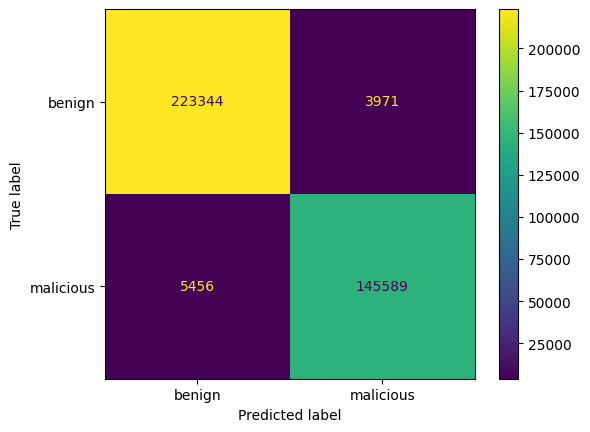

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,rfc_predictions)
cmDisplay = ConfusionMatrixDisplay(cm,display_labels=['benign','malicious'])
cmDisplay.plot();

In [56]:
y_true = Y_test
y_pred = rfc_predictions
TN = cm[0][0]
FP = cm[0][1]
specificity = TN/(TN+FP)
print(specificity)

0.9825308492620373


In [57]:
TP = cm[1][1]
FN = cm[1][0]
sensitivity = TP/(TP+FN)
print(sensitivity)

0.963878314409613


In [50]:
print(classification_report(Y_test,rfc_predictions,target_names=['benign', 'malicious']))

              precision    recall  f1-score   support

      benign       0.98      0.98      0.98    227315
   malicious       0.97      0.96      0.97    151045

    accuracy                           0.98    378360
   macro avg       0.97      0.97      0.97    378360
weighted avg       0.98      0.98      0.98    378360



<Axes: >

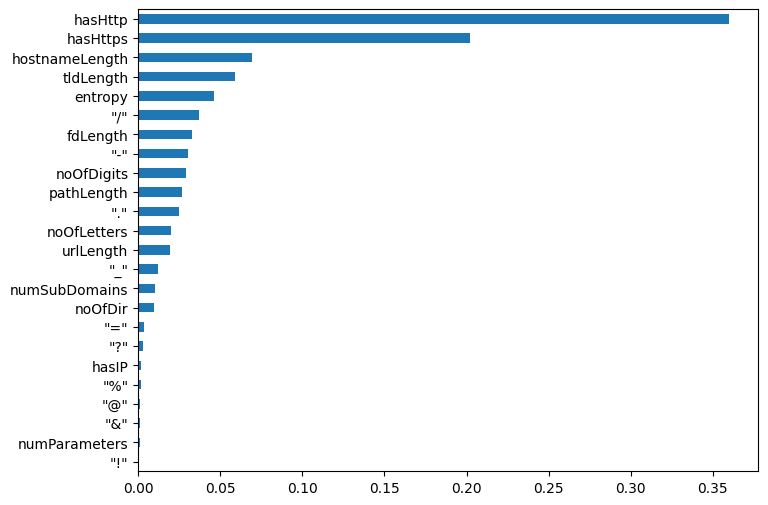

In [48]:
featureImportance = pd.Series(rfc.feature_importances_, index=X_trainosm.columns)
featureImportance.sort_values().plot(kind="barh",figsize=(8, 6))

In [ ]:
feature_names = X_trainosm.columns

In [31]:
import joblib
urlModel = joblib.load("url_model_final.pkl")

In [32]:
#make predictions
def featureExtraction(url):
    features = []
    features.append(getUrlLength(url))
    features.append(getHostnameLength(url))
    features.append(getPathLength(url))
    features.append(getTldLength(url))
    features.append(getNumOfHyphen(url))
    features.append(getNumOfAt(url))
    features.append(getNumOfQueMark(url))
    features.append(getNumOfPercMark(url))
    features.append(getNumOfSlash(url))
    features.append(getNumOfFullstop(url))
    features.append(getNumOfAmpersand(url))
    features.append(getNumOfUnderscore(url))
    features.append(getNumOfEqual(url))
    features.append(getNumOfExclamationMark(url))
    features.append(getNumOfDigits(url))
    features.append(getNumOfLetters(url))
    features.append(getNumOfDirectories(url))
    features.append(hasIP(url))
    features.append(getEntropy(url))
    features.append(hashttp(url))
    features.append(hashttps(url))
    features.append(fdLength(url))
    features.append(numParameters(url))
    features.append(numSubDomains(url))
    return features

In [36]:
def makePrediction(url):
    featuresTest = []
   
    featuresTest = featureExtraction(url)
    reshapedFeatures = np.array(featuresTest).reshape((1, -1))
    reshapedFeatures_df = pd.DataFrame(reshapedFeatures)
    prediction = urlModel.predict(reshapedFeatures_df)
    if int(prediction[0]) == 0:
        status="Benign"
        return status
    elif int(prediction[0]) == 1:
        status="Malicious"
        return status

In [ ]:
#pass entered url
print(makePrediction('imetrica.net/css/'))

In [65]:
#Save the model to a file
#import joblib
#filename = 'url_model_final.pkl'
#joblib.dump(rfc,filename)

['url_model_final.pkl']